# Part A : Analysing Mail Flow in Australian Capital Cities

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error

In [2]:
df_all = pd.read_csv('CityPairs.csv')

In [4]:
Capital_ports = ['Adelaide', 'Brisbane','Darwin', 'Hobart', 'Melbourne', 'Perth', 'Sydney']
df = df_all.loc[df_all['AustralianPort'].isin(Capital_ports)] # df contains data of capital ports only

In [5]:
df.head()

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
0,31048,Adelaide,Auckland,New Zealand,1513,42.167,0.311,985,18.704,0.924,2498,60.871,1.235,1985,1
1,31048,Adelaide,Bahrain,Bahrain,12,0.000,0.000,5,0.033,0.000,17,0.033,0.000,1985,1
2,31048,Adelaide,Bombay,India,7,0.000,0.000,5,0.000,0.000,12,0.000,0.000,1985,1
3,31048,Adelaide,Frankfurt,Germany,115,0.009,0.000,171,0.000,0.248,286,0.009,0.248,1985,1
4,31048,Adelaide,London,UK,1567,2.800,0.000,1472,10.618,2.487,3039,13.418,2.487,1985,1


In [6]:
# Create new dataframe with mail traffic data
lst = []
for i in Capital_ports:
    lst += [[i,sum(df[df.AustralianPort == f'{i}']['Mail_In_(tonnes)']),'Mail_In'],[i,sum(df[df.AustralianPort == f'{i}']['Mail_Out_(tonnes)']),'Mail_Out']]

In [7]:
df_mailflow = pd.DataFrame(lst,columns = ['AustralianPort','Mail_(tonnes)','Direction'])

Text(0.5, 1.0, 'Mail flow of Australian Ports')

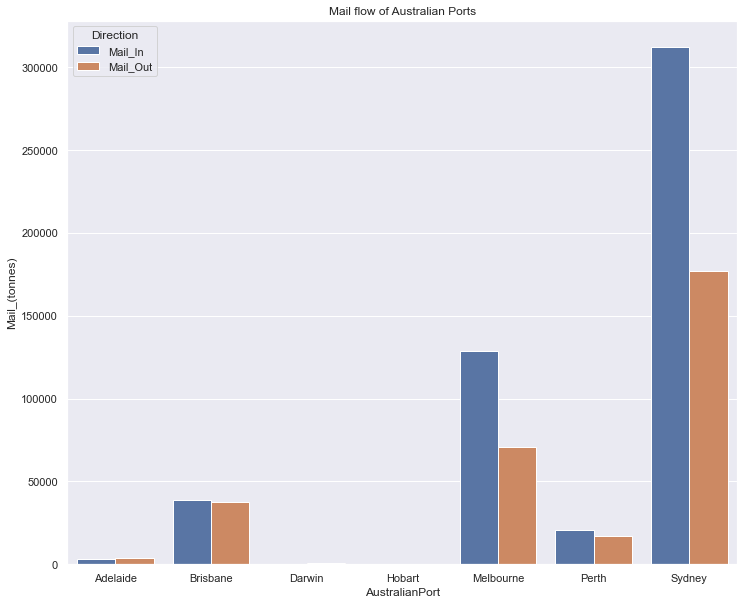

In [8]:
sns.set(rc={'figure.figsize':(12,10)})
sns.barplot(data=df_mailflow,x='AustralianPort',y='Mail_(tonnes)',hue='Direction')
plt.title('Mail flow of Australian Ports')

In [9]:
df_mailflow[df_mailflow['AustralianPort'] == 'Darwin']

,AustralianPort,Mail_(tonnes),Direction
4,Darwin,401.673,Mail_In
5,Darwin,589.191,Mail_Out


# Quesiton 1
<u><p style='font-size:17px;font-weight:bold'>1.1. Which city has the largest amount of mail flowing in? <br></p></u>
Sydney has the largest amound of inbound mail as indicated by the tallest bar height in the chart.

<u><p style='font-size:17px;font-weight:bold'>1.2. Can you properly compare the values for all cities by looking at the plot? Why? <br></p></u>
No, as there are cities with extremely high values relative to other cities, the scale of the y-axis is too large to have a proper comparison of values with low value cities. For example, the port of Darwin has a relatively small amount of mail traffic, but it is not visible on the bar chart due to the scale.

<u><p style='font-size:17px;font-weight:bold'>1.3. Why do you think the mail traffic amount is significantly higher for some of the ports? </p></u>
It could be due to the population in the cities. According to the Australian Bureau of Satistics (2020), the population of each capital cities are ranked similarly to the mail flow, which are:
<ol>
    <li>Sydney (5.2mil)</li>
    <li>Melbourne (5mil)</li>
    <li>Brisbane (2.5mil)</li>
    <li>Perth (2mil)</li>
    <li>Adelaide (1.3mil)</li>
    <li>Hobart (236,136)</li>
    <li>Darwin (147,255)</li>
    
</ol>
Therefore, it can be said that with a larger population, the demand for mail is higher

In [10]:
#create new dataframe for perth and brisbane
lst2= []
for i in df.Year.unique():
    lst2 += [['Perth',i,df[(df['AustralianPort'] == 'Perth') & (df['Year']== i)]['Mail_In_(tonnes)'].sum()]]
    lst2 += [['Brisbane',i,df[(df['AustralianPort'] == 'Brisbane') & (df['Year']== i)]['Mail_In_(tonnes)'].sum()]]

In [11]:
df_mailtraffic = pd.DataFrame(lst2,columns = ['AustralianPort','Year','Mail_In_Total_(tonnes)'])

Text(0.5, 1.0, 'Mail Traffic inbound to Australian Ports')

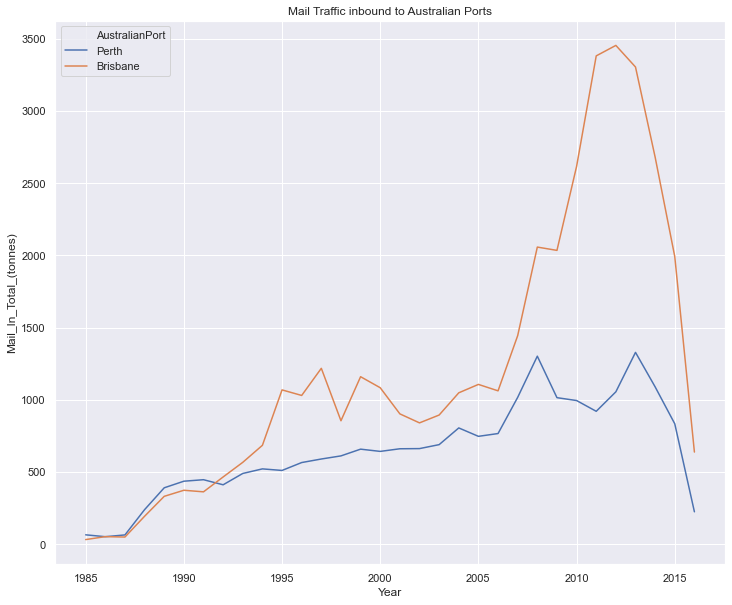

In [12]:
sns.lineplot(data=df_mailtraffic,x='Year',y='Mail_In_Total_(tonnes)',hue='AustralianPort')
plt.title('Mail Traffic inbound to Australian Ports')

In [13]:
#Perth percentage change
df_mailtraffic[(df_mailtraffic['Year'] <= 1990) & (df_mailtraffic['AustralianPort'] == 'Perth')]['Mail_In_Total_(tonnes)'].pct_change()

0          NaN
2    -0.201582
4     0.238611
6     2.757884
8     0.634013
10    0.117015
Name: Mail_In_Total_(tonnes), dtype: float64

In [14]:
#Brisbane percentage change
df_mailtraffic[(df_mailtraffic['Year'] <= 1990) & (df_mailtraffic['AustralianPort'] == 'Brisbane')]['Mail_In_Total_(tonnes)'].pct_change()

1          NaN
3     0.655640
5    -0.053145
7     2.944690
9     0.714911
11    0.127137
Name: Mail_In_Total_(tonnes), dtype: float64

In [15]:
# Perth mail-in traffic 5 year data 
lst0 = []
for i in range(2011,2017):
    tmp = list(df[(df['AustralianPort'] == 'Perth') & (df['Year'] == i)]['Mail_In_(tonnes)'].describe())
    tmp.insert(0,i)
    lst0 += [tmp]
# Data is formatted as dataframe for better viewing
pd.DataFrame(lst0,columns = ['Year','Count','Mean','std','min','25%','50%','75%','max']) 

,Year,Count,Mean,std,min,25%,50%,75%,max
0,2011,169.0,5.442734,10.205905,0.0,0.0,1.2840,3.19300,47.887
1,2012,173.0,6.097462,11.993625,0.0,0.0,0.3770,3.02800,50.181
2,2013,182.0,7.296681,13.185025,0.0,0.0,0.0015,6.34300,59.130
3,2014,189.0,5.762180,11.245662,0.0,0.0,0.1390,7.36100,60.484
4,2015,193.0,4.317026,9.473052,0.0,0.0,0.0590,3.82500,51.093
5,2016,78.0,2.868936,5.482965,0.0,0.0,0.1310,4.17125,27.538


In [16]:
# Brisbane mail-in traffic 5 year data 
lst0 = []
for i in range(2011,2017):
    tmp = list(df[(df['AustralianPort'] == 'Brisbane') & (df['Year'] == i)]['Mail_In_(tonnes)'].describe()) #list for describe()
    tmp.insert(0,i) #insert year into front of the describe() list
    lst0 += [tmp] #add to main list
    
# Data is formatted in dataframe for better viewing
pd.DataFrame(lst0,columns = ['Year','Count','Mean','std','min','25%','50%','75%','max'])

,Year,Count,Mean,std,min,25%,50%,75%,max
0,2011,377.0,8.970403,22.732476,0.0,0.0,0.0000,0.89900,134.797
1,2012,358.0,9.648905,20.079544,0.0,0.0,0.0000,0.77075,115.602
2,2013,330.0,10.014115,17.718396,0.0,0.0,0.0135,14.81075,99.392
3,2014,324.0,8.272892,14.653562,0.0,0.0,0.0180,14.06125,100.937
4,2015,315.0,6.321432,11.906381,0.0,0.0,0.0000,7.63950,58.549
5,2016,132.0,4.829947,10.895528,0.0,0.0,0.0000,5.06800,59.561


# Quesiton 2
<u><p style='font-size:17px;font-weight:bold'>2.1. How was the mail package traffic to each of the Brisbane and Perth ports in the
mid-80s? <br></p></u>
According to the line chart, both cities showed a similar growth trend in the mid-80s, where the mail traffic was relatively stagnant. However, looking further into the percentage change for Brisbane showed that there was a 65% growth in 1986, compared to a 20% decrease for Perth in the same year.

<u><p style='font-size:17px;font-weight:bold'>2.2. How was the total mail traffic to Brisbane and Perth in 2016? <br></p></u>
To answer the quesiton, the mail-in traffic data of the past 5 years is listed and analysed for both of the cities. Firstly, both cities had the lowest amount of yearly port entry, as well as the lowest mean mail-in weight per entry in 2016 compared to the past 5 years. For Perth, the maximum mail-in weight in 2016 decreased by 45%, compared to the highest maximum of 60 tonnes in 2014. 

In general, there is a decreasing pattern in mail-in traffic for both of the city's ports.

# Part B1 : Linear Regression and Prediction

In [17]:
#create dataframe fot annual freight
df_annualfreight = pd.DataFrame([[i,sum(df[df['Year'] == i]['Freight_Total_(tonnes)'])] for i in df.Year.unique()],columns = ['Year','Freight_Total_(tonnes)'])

Text(0.5, 1.0, 'Total annual freight for captial ports')

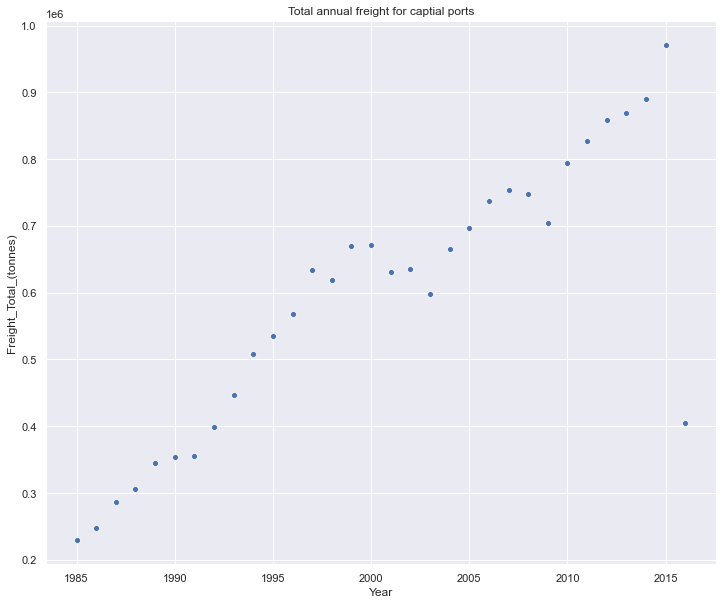

In [18]:
sns.scatterplot(data=df_annualfreight,x='Year',y='Freight_Total_(tonnes)')
plt.title('Total annual freight for captial ports')

In [19]:
df_annualfreight['Freight_Total_(tonnes)'].describe()

count        32.000000
mean     592518.789969
std      204506.840733
min      230272.052000
25%      403832.119000
50%      632138.236000
75%      739975.605000
max      970265.749000
Name: Freight_Total_(tonnes), dtype: float64

In [20]:
#splitting dataframe
x = df_annualfreight[['Year']]
y = df_annualfreight[['Freight_Total_(tonnes)']]

#Fitting linear regression
linreg = LinearRegression() 
linreg.fit(x,y) 

LinearRegression()

In [21]:
y_pred = linreg.predict(x) #predicting y values

In [22]:
mean_squared_error(y,y_pred,squared=False) #RMSE

100407.52328731513

Text(0.5, 1.0, 'Total annual freight for captial ports')

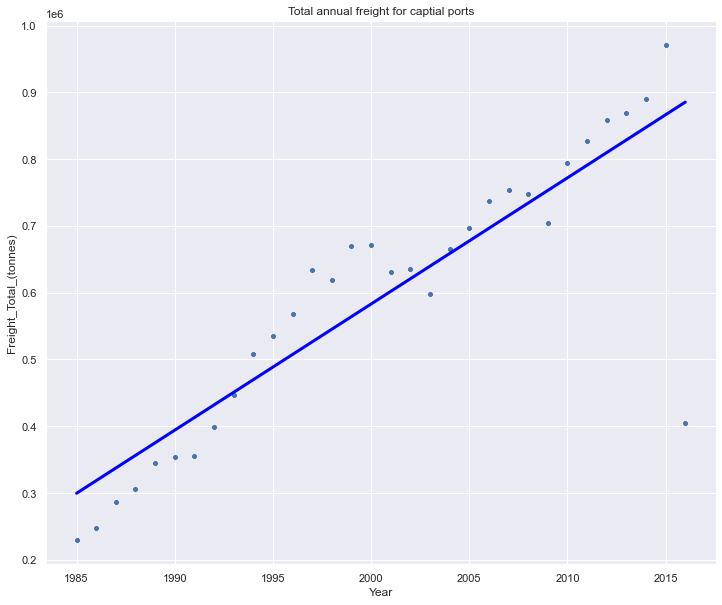

In [23]:
sns.scatterplot(data=df_annualfreight,x='Year',y='Freight_Total_(tonnes)')
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.title('Total annual freight for captial ports')

In [24]:
print(linreg.coef_)

[[18894.49233999]]


In [25]:
linreg.predict([[2020]])

array([[960961.39059861]])

In [26]:
# Dataframe with data above 2005
new_af = pd.DataFrame(df_annualfreight[df_annualfreight['Year']>=2005])
new_af.reset_index(inplace=True,drop=True)

In [27]:
x2 = new_af[['Year']]
y2 = new_af[['Freight_Total_(tonnes)']]
linreg2 = LinearRegression()
linreg2.fit(x2,y2)

LinearRegression()

In [28]:
y2_pred = linreg2.predict(x2)

In [29]:
linreg2.predict([[2020]])

array([[802553.15429254]])

Text(0.5, 1.0, 'Total annual freight for captial ports')

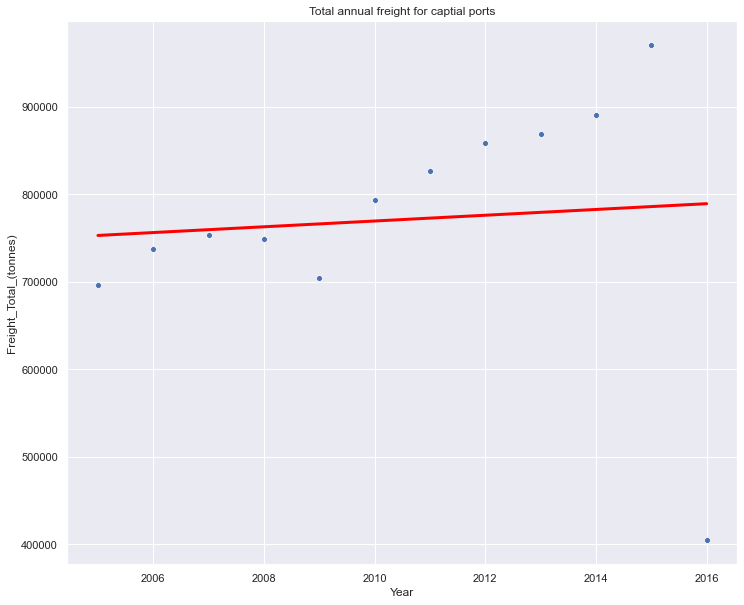

In [30]:
sns.scatterplot(data=new_af,x='Year',y='Freight_Total_(tonnes)')
plt.plot(x2, y2_pred, color='red', linewidth=3)
plt.title('Total annual freight for captial ports')

Text(0.5, 1.0, 'Total annual freight for captial ports')

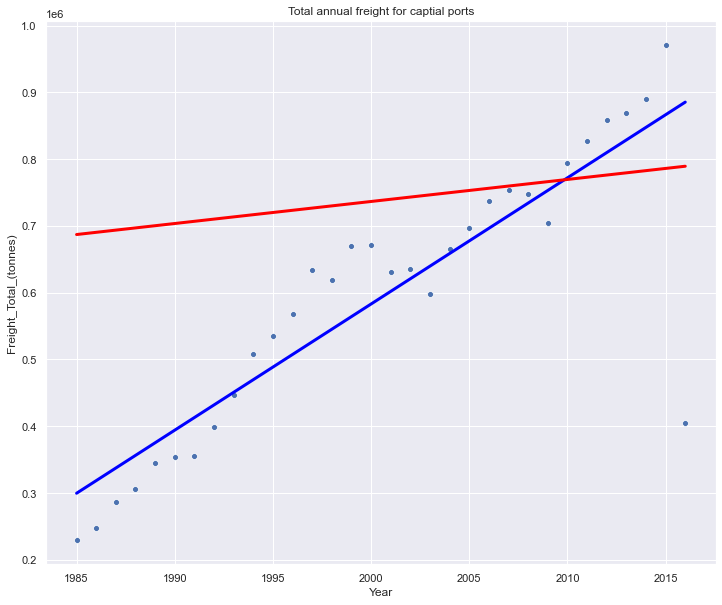

In [31]:
sns.scatterplot(data=df_annualfreight,x='Year',y='Freight_Total_(tonnes)')
plt.plot(x, y_pred, color='blue', linewidth=3)
y2_pred = linreg2.predict(x)
plt.plot(x, y2_pred, color='red', linewidth=3)
plt.title('Total annual freight for captial ports')

# Quesiton B1
<u><p style='font-size:17px;font-weight:bold'>1. Does the data show a clear pattern? Describe the relationship you observe. <br></p></u>
For the most part, the data on the scatter plot clearly resembles a linear relationship between the Year and Freight_Total. As the year increases, the freight_total also increases. However, there exists a datapoint in 2016 that does not conform to the pattern.

<u><p style='font-size:17px;font-weight:bold'>2. Are there any outliers? If so, use the IQR rule to remove the outliers.  <br></p></u>

IQR = 739975.605000-403832.119000 = 336143.486 <br>
Based on the IQR rule:<br>
The upper boundary is 739975.605000 + 1.5(336143.486) =1244190.834<br>
The lower boundary is 403832.119000 - 1.5(336143.486) = -100383.11<br>

Therefore, there are no outliers present in the data.

<u><p style='font-size:17px;font-weight:bold'>3. Create a simple linear regression to model the relationship between Year and
the Total Freight. Does the linear fit look to be a good fit? Justify your answer. <br></p></u>
Visually, it is a good fit as it looks like it represents the relationship between the variables appropriately. To further prove this, we take a look at the root mean square error of the model. The model has an RMSE of about 100407.5 tonnes. Considering the freight weight ranges between 1 million and 2 hundred thousand, it can be said that an RMSE of 100407 represents an adequately fitted model, where data points are close to the line.


<u><p style='font-size:17px;font-weight:bold'>4. How fast is the total amount of freight increasing each year?  <br></p></u>
The rate at which the total amount of freight is increasing each year is 18894.49233999 tonnes. This is given by the regression coeficcient.

<u><p style='font-size:17px;font-weight:bold'>5. What does the linear model predict for the total freight volume at Australian
state capital ports in 2020?<br></p></u>
The model predicted 960961.39059861 tonnes of freight in 2020.

<u><p style='font-size:17px;font-weight:bold'>6. Try fitting the linear model only to the data from the year 2005 onwards. What
happens to the prediction for 2020? Which prediction could you trust more?
Why? <br></p></u>
The prediction for 2020 with the second model is 802553.15429254 tonnes, which roughly has an 18% difference compared to the predicted value of the first model. In my opinion, I would trust the first model more, as the first model has more data to work with and thus can produce a model that better reflects the relationship between the two variables. Besides that, by plotting both linear regressions on the scatter plot we can see that the first model appears closer to the actual values.

# Part B2 : Comparing Traffic Volumes

In [32]:
#new dataframe for monthly traffic
df_passengers = pd.DataFrame([[i,sum(df_all[df_all['Month'] == i].Passengers_In),sum(df_all[df_all['Month'] == i].Passengers_Out)]for i in df_all.Month.unique()],columns = ['Month','Passengers_In','Passengers_Out'])

In [33]:
df_passengers

,Month,Passengers_In,Passengers_Out
0,31048,263795,208770
1,31079,204953,179222
2,31107,209513,231582
3,31138,182673,214403
4,31168,198902,224350
...,...,...,...
372,42370,1918279,1642059
373,42401,1560692,1375060
374,42430,1470519,1538491
375,42461,1481204,1478169


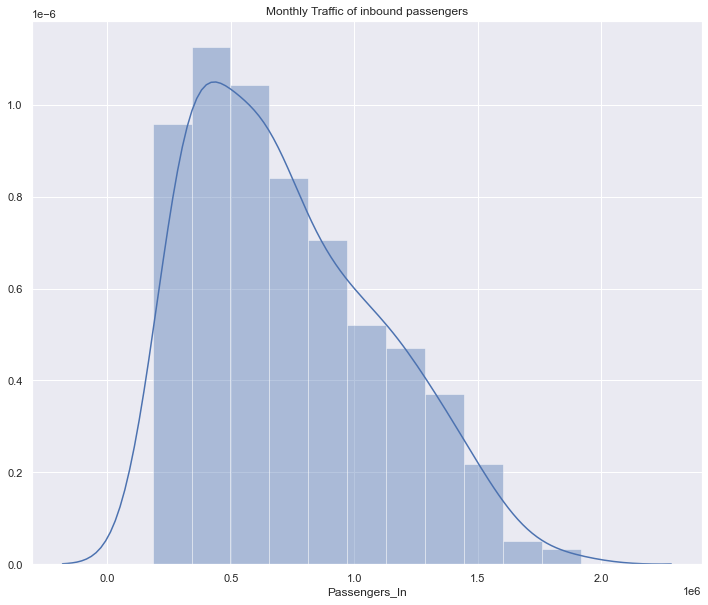

In [34]:
sns.distplot(df_passengers['Passengers_In'])
plt.title('Monthly Traffic of inbound passengers')
plt.show()

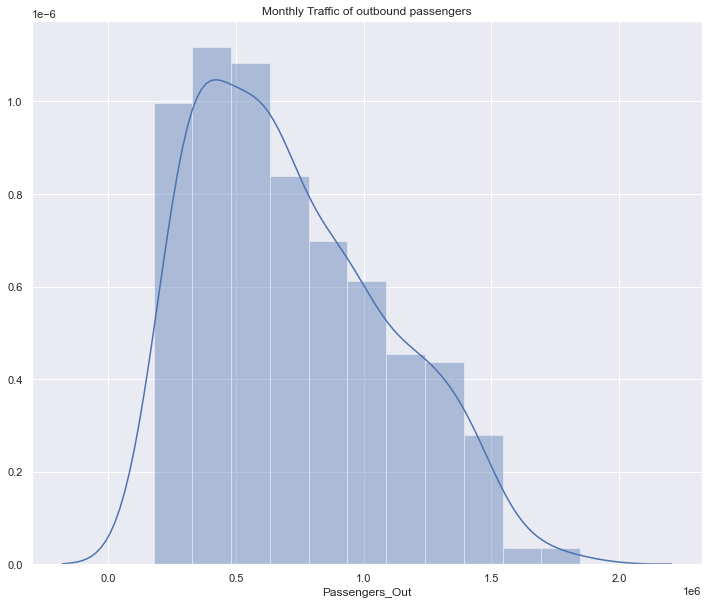

In [35]:
sns.distplot(df_passengers['Passengers_Out'])
plt.title('Monthly Traffic of outbound passengers')
plt.show()

Text(0.5, 1.0, 'Monthly traffic of Passengers_In and Passengers_Out')

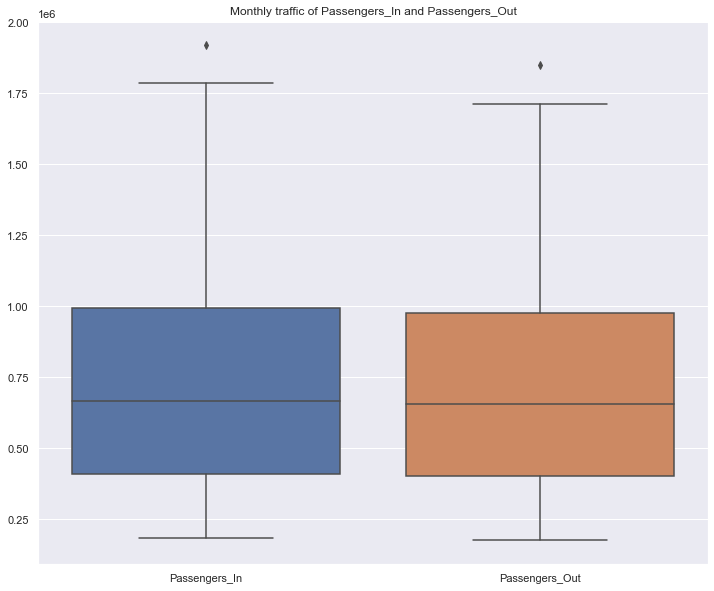

In [36]:
sns.boxplot(data=df_passengers.iloc[:,1:])
plt.title('Monthly traffic of Passengers_In and Passengers_Out')

In [37]:
df_passengers.iloc[:,1:].describe()

,Passengers_In,Passengers_Out
count,3.770000e+02,3.770000e+02
mean,7.317297e+05,7.210568e+05
std,3.759759e+05,3.673378e+05
min,1.826730e+05,1.783190e+05
25%,4.079340e+05,4.037060e+05
50%,6.662590e+05,6.561840e+05
75%,9.944660e+05,9.759200e+05
max,1.918279e+06,1.847744e+06


In [38]:
df_passengers[df_passengers['Passengers_In'] >1874264].iloc[:,0:2]

,Month,Passengers_In
372,42370,1918279


In [39]:
df_passengers[df_passengers['Passengers_Out'] >1834241].iloc[:,[0,2]]

,Month,Passengers_Out
371,42339,1847744


# Quesiton B2
<u><p style='font-size:17px;font-weight:bold'>1.Describe the distributions. Can
you see any outliers in the plots? Discuss your answer. <br></p></u>
Both histograms of `Passengers_In` and `Passengers_Out` shows a right skewed normal distribution, as they show a 'long tail' towards the positive x-axis. Based on the plots, there is no obvious outliers. 

A right skewed distribution means that most data falls into the right side, in the context of the question, this shows that there are usually large amounts of monthly passengers heading in or out of Australian ports. Other than that, there are no observable outliers as it would be indicated by a seperate bar away from the rest of the data.

<u><p style='font-size:17px;font-weight:bold'> 2.Use boxplots to visualise the information of question 1.1. How many outliers
can you see in the plots? Use the IQR rule to show the data points which are
considered as outliers.<br></p></u>
According to the box plot, there is a single outlier in each of `Passengers_In` and `Passengers_Out`. Utilizing the IQR rule:
<p style='font-size:17px;font-weight:bold'> Passengers_In </p>
IQR = 9.944660e+05	 - 4.079340e+05	 = 586532 <br>
Based on the IQR rule:<br>
The upper boundary is  9.944660e+05 + 1.5(586532) = 1874264<br>
The lower boundary is 4.079340e+05 - 1.5(586532) = -471864<br>

<p style='font-size:17px;font-weight:bold'> Passengers_Out </p>
IQR = 9.759200e+05	 - 4.037060e+05	 = 572214 <br>
Based on the IQR rule:<br>
The upper boundary is  9.759200e+05 + 1.5(572214) = 1834241<br>
The lower boundary is 4.037060e+05 - 1.5(572214) = -454615<br>

Similar to the box plots, the IQR rule also pointed out a single outlier in each of the data, which is month 42370 for `Passengers_In` and month 42339 for `Passengers_Out`

<u><p style='font-size:17px;font-weight:bold'> 3. What are the differences between
the information which are shown in a box plot and the output of function
“describe()”?<br></p></u>
The boxplot represents most information obtained from the `describe()` function, with the exception of count, standard deviation and mean. Fruthermore, any outlier is clearly shown in a boxplot, whereas additional calculations are necessary to compute the outliers based on the information from `describe()`.

# Part C - Clustering task

In [40]:
df_cluster = pd.read_csv('ClusteringData.csv')

In [41]:
df_cluster.head()

,GDP per Capita,Suicide Rate
0,1.44178,0.44453
1,1.52733,0.41203
2,1.42666,0.14975
3,1.57744,0.35776
4,1.40598,0.41004


In [42]:
df_cluster.shape

(157, 2)

Text(0.5, 1.0, 'GDP per capita with Suicide Rate')

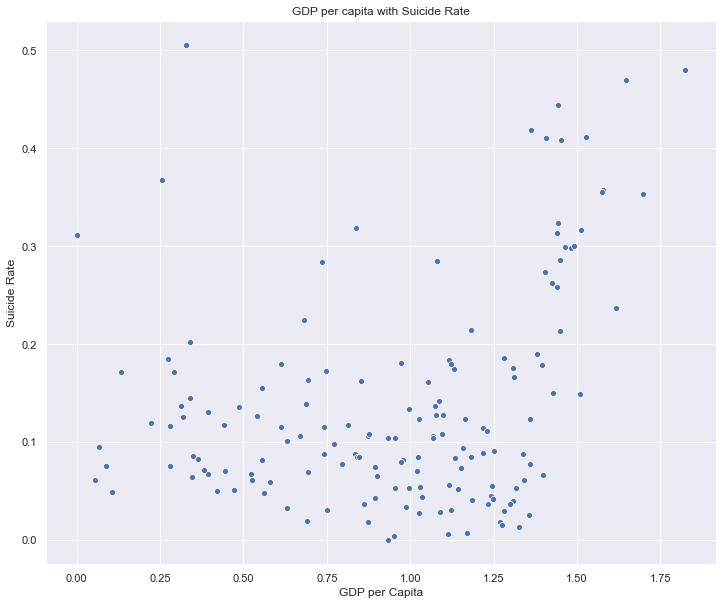

In [43]:
sns.scatterplot(data=df_cluster,x=df_cluster['GDP per Capita'],y=df_cluster['Suicide Rate'])
plt.title('GDP per capita with Suicide Rate')

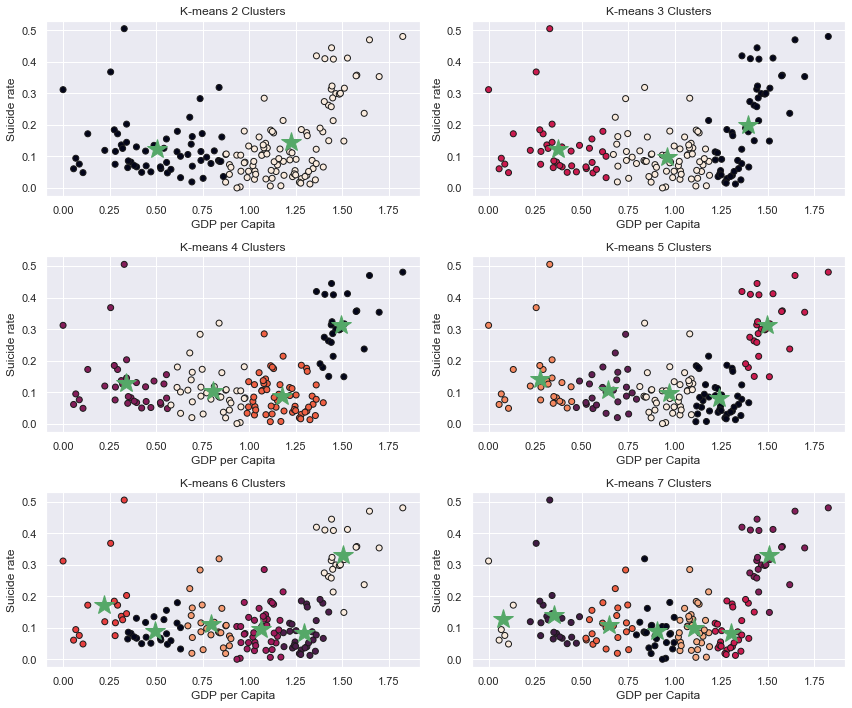

In [44]:
# Implementing K-Means clustering 

fig, axs = plt.subplots(3,2)
for i in range(1,8):
    
    #kmeans
    kmeans = KMeans(n_clusters=i).fit(df_cluster[['GDP per Capita','Suicide Rate']])
    plt.scatter(x=df_cluster['GDP per Capita'],y=df_cluster['Suicide Rate'], c=kmeans.labels_ ,edgecolor='k')
    plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'k*',markersize=20,c='g')
    
    #plot formatting
    plt.xlabel('GDP per Capita')
    plt.ylabel('Suicide rate')
    plt.title(f'K-means {i} Clusters')
    plt.tight_layout()
    if i > 6:
        break
    plt.subplot(3,2,i)

# Question C
In 6 of the diagrams above, k-means clustering is performed with different k values, ranging from 2 to 7. Based on the visualizations, the best value of K is 2. This is because with 3 clusters and above, each clusters are very close to each other, thus resulting in a bad seperation and a high inter-cluster similarity. Although the best value of K still shows two bordering clusters, each clusters are distinct, compared to clusters with higher values of K.

# Challenge 1

In [45]:
#https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb

#silhouette score 
sil = []
kmax = 10
for k in range(2, kmax+1):
  kmeans_new = KMeans(n_clusters = k).fit(df_cluster[['GDP per Capita','Suicide Rate']])
  labels = kmeans_new.labels_
  sil.append(silhouette_score(df_cluster[['GDP per Capita','Suicide Rate']], labels, metric = 'euclidean'))

To plot the silhouette score for different k values, we iterate over a range of different k-means clusters and record the silhoutte score of each in `sil` list.

Text(0.5, 1.0, 'Sillhouette Score with different K values')

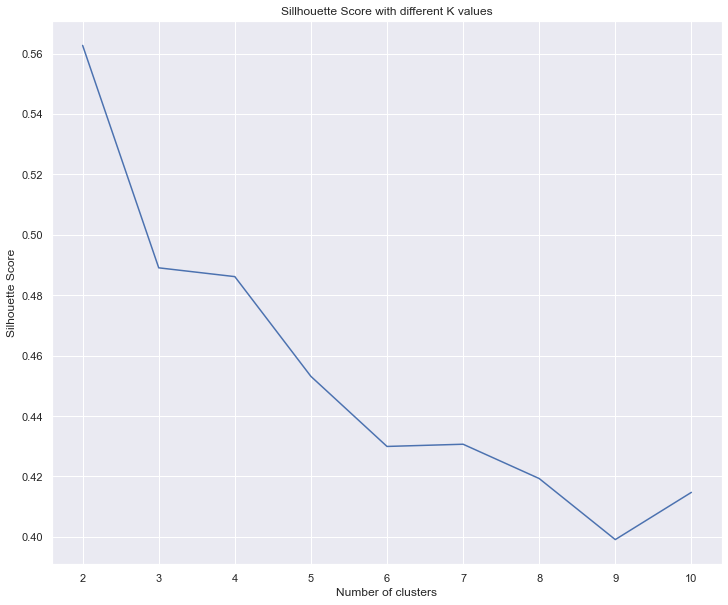

In [49]:
sns.lineplot(y=sil,x=range(2, kmax+1))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title('Sillhouette Score with different K values')

# Question Challenge 1
<u><p style='font-size:17px;font-weight:bold'> 1. Explain how the Silhouette score works and what is the meaning of having the
following results as a Silhouette score?</u></p>
Silhouette score is a metric ranging from -1 to 1 that is used to determine how well clusters are classified. It is calculated by taking the mean Silhouette coefficient of each clusters. The formula for silhouette coefficient is  $\large\frac{b-a}{max(a,b)}$, where $a$ is the average intra-cluster distance and $b$ is the average inter-cluster distance of the nearest cluster. The ideal coefficient is 1, because the best case scenario happens when there is an infinite inter-cluster value and zero intra-cluster distance, therefore according to the formula, $\large\frac{\infty-0}{\infty} = 1$. The oppsite happens with a badly seperated cluster, resulting in the -1 value.
    <ol>
        <li>Silhouette Score is 0.02</li>
            The score is very close to zero, which means that there are no strong structure and the samples are on the decision border of neighbouring clusters (Scikit-learn, n.d.). 
    <br><br>
        <li>Silhouette Score is -0.06</li>
            A small negative values means that some values on the border of clusters are wrongly assigned.
    <br><br>
        <li>Silhouette Score is 0.97</li>
            The score is close to 1, which means that each clusters are clearly seperated and each datapoint in a cluster are very close to each other.
    <br><br>
        <li>Silhouette Score is -0.9</li>
            The score is close to -1, which means that a large number datapoints are assigned to the wrong clusters.
    </ol>
 <br>
 
<u><p style='font-size:17px;font-weight:bold'> 2. Implement Silhouette score in Sklearn and find out the best number of clusters (K)
based on the silhouette score. <br></u></p>
To find the optimal number of clusters using silhouette score, 9 models with different k values are tested and their scores are recorded. After plotting the graph of the scores, it is evident that 2 clusters produce the highest silhouette score of roughly 0.57, as a downward trend is observed when the number of clusters increase.

# Questions Challenge 2

<u><p style='font-size:17px;font-weight:bold'> 1. What is the transformation which you used? <br></p></u>
The scale of the axis after the transformation increased greatly, and all the negative values are eliminated from the graph. Therefore, it can be said that a squared transformation is used, as each negative number is squared to become a positive, and the largest x-axis value in the original graph, matches up the new x-axis when squared.

<u><p style='font-size:17px;font-weight:bold'> 2. Do you think your decision to transform the data with that transformation is a good
idea? Discuss your answer.
<br></p></u>
Yes, I think it is a good idea. In the un-altered graph, it is difficult to produce a model that mimics the relationship between the variables, due to the unusual shape. However, in the transformed graph, a clear and regular pattern can be seen.

# Referances
1. Regional population, 2018-19. Australian Bureau of Statistics. (2020). Retrieved 7 October 2020, from https://www.abs.gov.au/statistics/people/population/regional-population/2018-19.

2. Selecting the number of clusters with silhouette analysis on KMeans clustering — scikit-learn 0.23.2 documentation. Scikit learn. Retrieved 11 October 2020, from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#:~:text=A%20value%20of%200%20indicates,assigned%20to%20the%20wrong%20cluster.&text=Also%20from%20the%20thickness%20of,cluster%20size%20can%20be%20visualized.